# 1.Import Necessary Libraries

In [1]:
import numpy as np  #linear algebra
import pandas as pd  #data processing
import matplotlib.pyplot as plt  #data visualization
import seaborn as sns #statistical data visualization
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split  #for Distribution of Data

##  2. Import Data 

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


 # 3.Data Undersatnding 

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
col_names=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [6]:
df.columns=col_names

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [11]:
df['ShelveLoc']=label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['US']=label_encoder.fit_transform(df['US'])

In [12]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [13]:
df['Sales'].mean()

7.496325

In [14]:
sales_val = []
for value in df["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
df["sales_val"]=sales_val  

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [16]:
df["sales_val"]=label_encoder.fit_transform(df["sales_val"])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [17]:
df1=df.drop(['Sales'],axis=1)
df1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [18]:
df1.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_val      0
dtype: int64

In [19]:
df1.duplicated().sum()

0

In [20]:
df1.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
sales_val      int32
dtype: object

In [21]:
df1.count()

CompPrice      400
Income         400
Advertising    400
Population     400
Price          400
ShelveLoc      400
Age            400
Education      400
Urban          400
US             400
sales_val      400
dtype: int64

In [22]:
df1.describe(include='all')

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.50250
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.50062
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.00000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.00000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,1.00000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.00000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.00000


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  sales_val    400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


In [24]:
df1.duplicated().sum()

0

In [25]:
df1.drop_duplicates(subset='CompPrice',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
240,159,80,0,362,121,2,26,18,1,0,0
287,95,44,4,208,72,0,44,17,1,1,1
310,175,65,29,419,166,2,53,12,1,1,0
365,154,30,0,122,162,2,57,17,0,0,1


In [26]:
df1.drop_duplicates(subset='Income',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
356,142,109,0,111,164,1,72,12,1,0,1
362,131,55,0,26,110,0,79,12,1,1,1
386,152,116,0,170,160,2,39,16,1,0,1
395,138,108,17,203,128,1,33,14,1,1,0


In [27]:
df1.drop_duplicates(subset='Advertising',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
5,124,113,13,501,72,0,78,16,0,1,0
6,115,105,0,45,108,2,71,15,1,0,1
7,136,81,15,425,120,1,67,10,1,1,0
10,121,78,9,150,100,0,26,10,0,1,0
12,122,35,2,393,136,2,62,18,1,0,1


In [28]:
df1.drop_duplicates(subset='Population',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
390,108,75,9,61,111,2,67,12,1,1,1
391,153,63,0,49,124,0,56,16,1,0,1
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1


In [29]:
df1.drop_duplicates(subset='Price',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
336,138,35,6,60,143,0,28,18,1,0,1
356,142,109,0,111,164,1,72,12,1,0,1
365,154,30,0,122,162,2,57,17,0,0,1
367,95,106,0,256,53,1,52,17,1,0,0


In [30]:
df1.drop_duplicates(subset='ShelveLoc',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0


In [31]:
df1.drop_duplicates(subset='Age',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
5,124,113,13,501,72,0,78,16,0,1,0
6,115,105,0,45,108,2,71,15,1,0,1
7,136,81,15,425,120,1,67,10,1,1,0
8,132,110,0,108,124,2,76,10,0,0,1
10,121,78,9,150,100,0,26,10,0,1,0


In [32]:
df1.drop_duplicates(subset='Education',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
5,124,113,13,501,72,0,78,16,0,1,0
6,115,105,0,45,108,2,71,15,1,0,1
12,122,35,2,393,136,2,62,18,1,0,1
25,139,32,0,176,82,1,54,11,0,0,0


In [33]:
df1.drop_duplicates(subset='Urban',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
5,124,113,13,501,72,0,78,16,0,1,0


In [34]:
df1.drop_duplicates(subset='US',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
4,141,64,3,340,128,0,38,13,1,0,1


In [35]:
df1.drop_duplicates(subset='sales_val',inplace=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1


In [36]:
df1.shape

(400, 11)

In [37]:
df1.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_val      0
dtype: int64

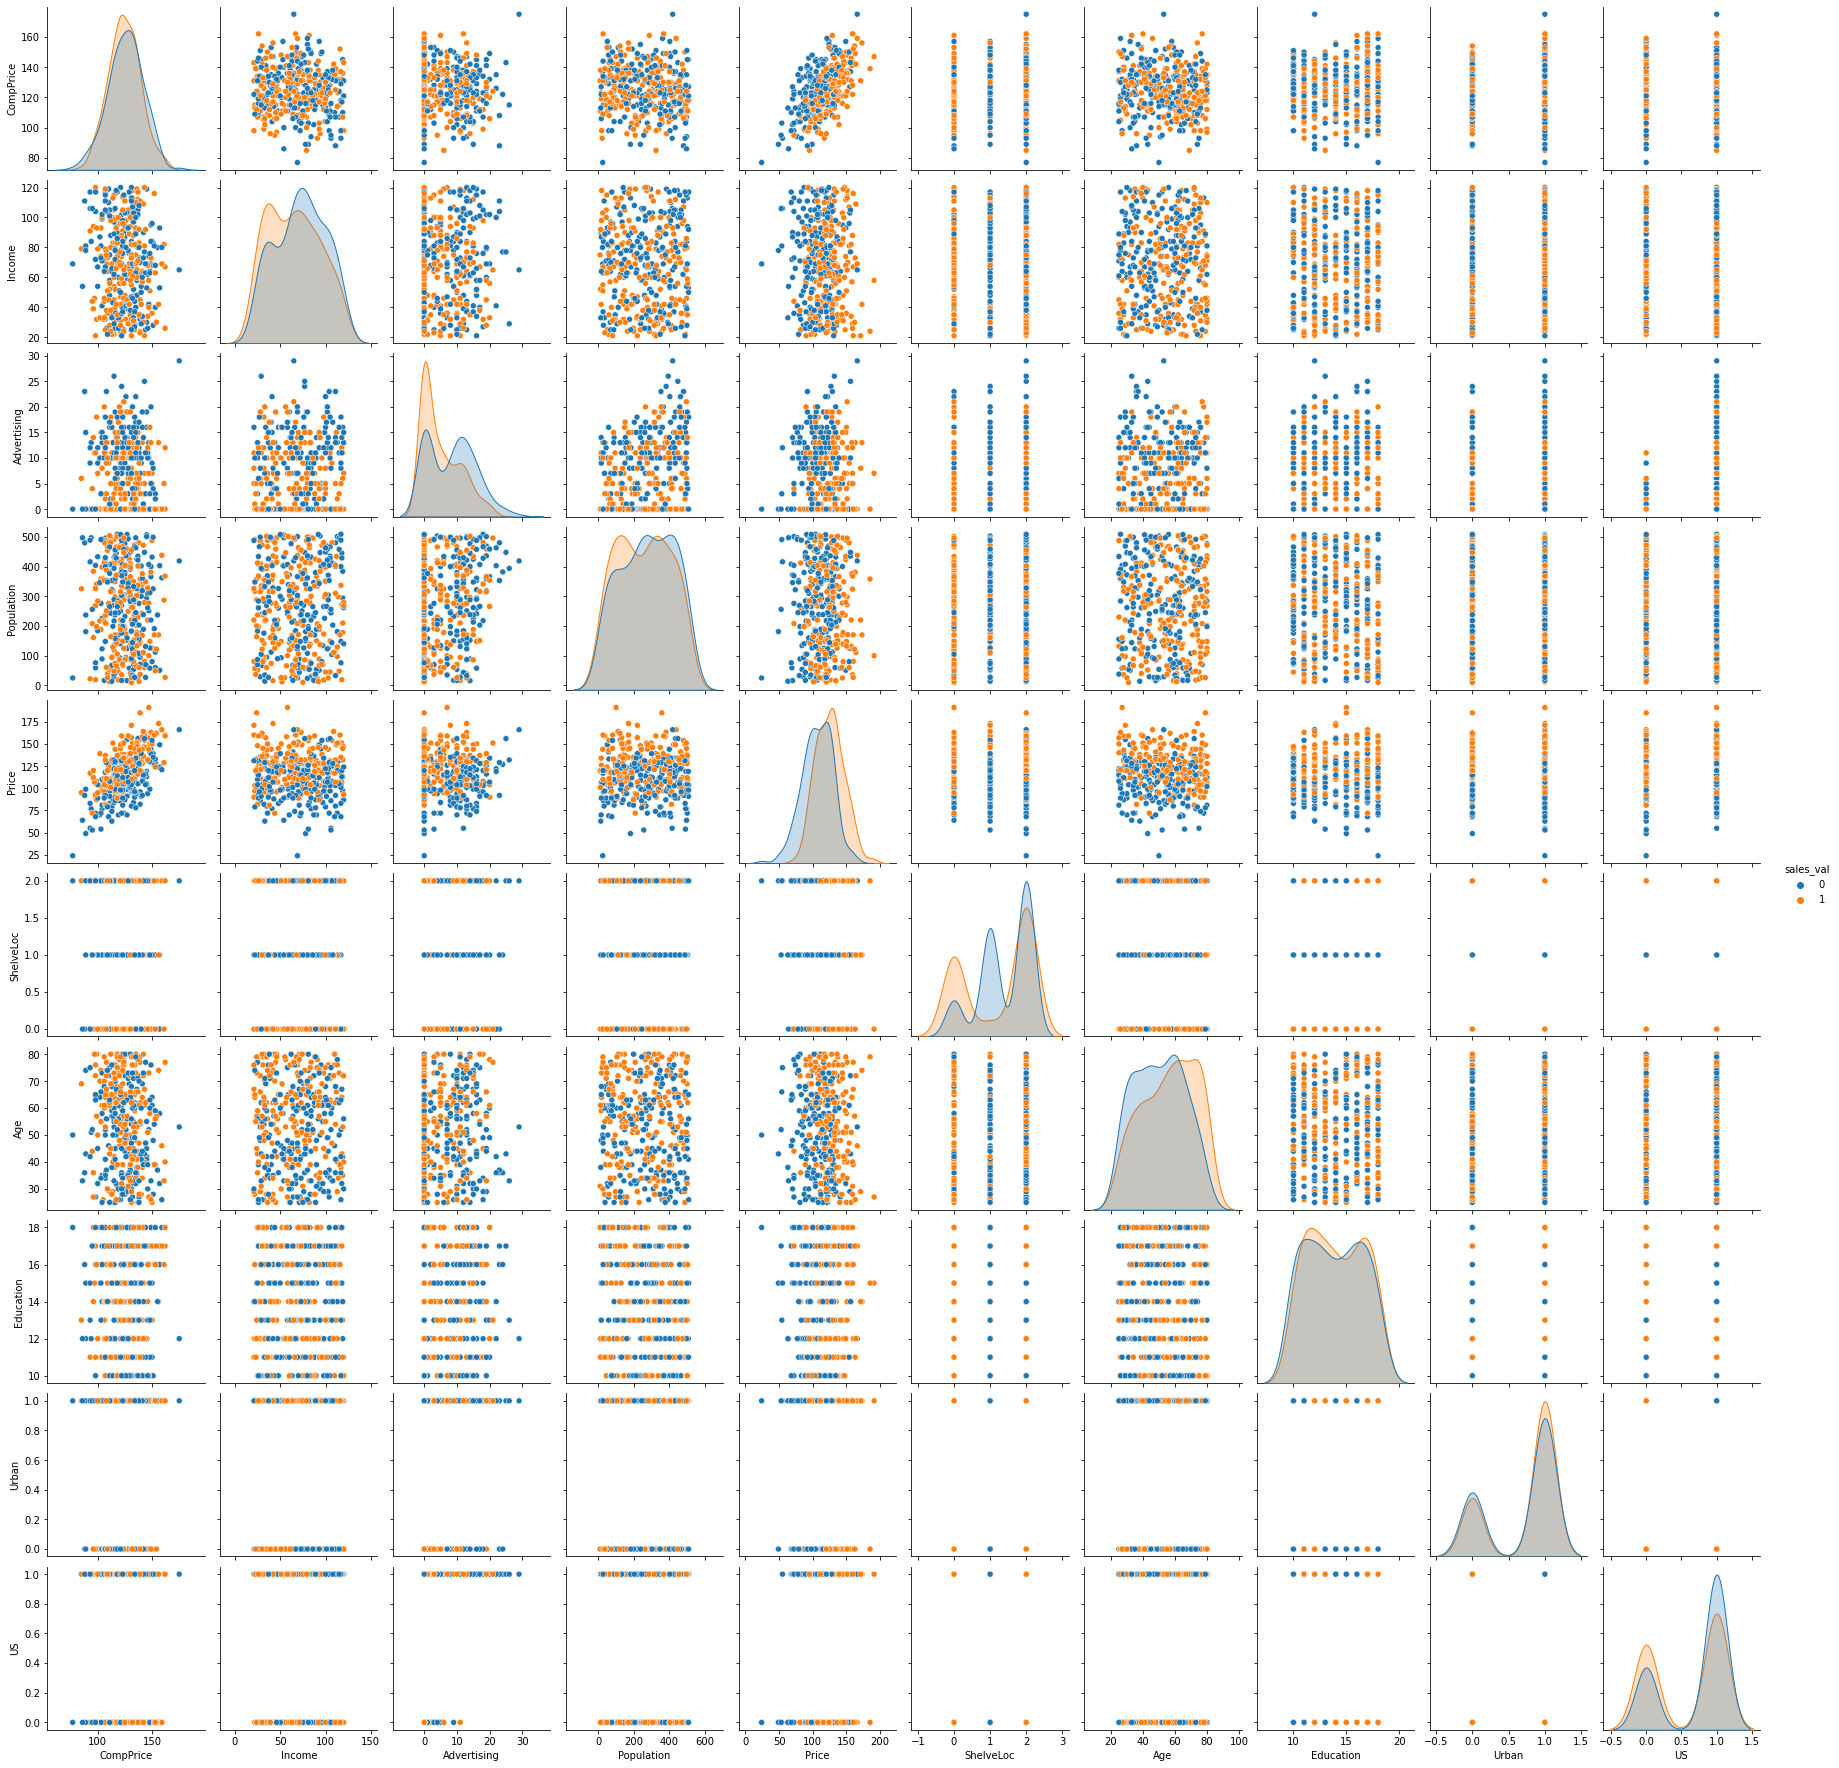

In [38]:
import seaborn as sns
sns.pairplot(data=df1,hue='sales_val')

In [39]:
X = df1.drop(['sales_val'], axis=1)

y = df1['sales_val']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [41]:
X_train.shape,y_train.shape

((320, 10), (320,))

In [42]:
X_test.shape,y_test.shape

((80, 10), (80,))

In [43]:
X_train.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object

In [44]:
y_train.dtypes

dtype('int32')

## Decision Tree with Gini Criteria

In [45]:
from sklearn.tree import DecisionTreeClassifier
Clf_gini=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [46]:
Clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [47]:
y_predict_gini=Clf_gini.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_predict_gini)

0.7875

In [50]:
y_Train_predict_gini=Clf_gini.predict(X_train)
y_Train_predict_gini

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,

In [51]:
accuracy_score(y_train,y_Train_predict_gini)

0.76875

# Check for overfitting and underfitting 

In [52]:
accuracy_score(y_test,y_predict_gini),accuracy_score(y_train,y_Train_predict_gini)

(0.7875, 0.76875)

In [53]:
#Here, the training-set accuracy score is 0.7675 while the test-set accuracy to be 0.7875.
#These two values are quite comparable. So, there is no sign of overfitting.

## Visualize decision-trees

[Text(0.5, 0.875, 'X[4] <= 105.5\ngini = 0.499\nsamples = 320\nvalue = [154, 166]'),
 Text(0.25, 0.625, 'X[6] <= 64.0\ngini = 0.391\nsamples = 109\nvalue = [80, 29]'),
 Text(0.125, 0.375, 'X[0] <= 118.5\ngini = 0.275\nsamples = 79\nvalue = [66, 13]'),
 Text(0.0625, 0.125, 'gini = 0.416\nsamples = 44\nvalue = [31, 13]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.375, 0.375, 'X[4] <= 89.5\ngini = 0.498\nsamples = 30\nvalue = [14, 16]'),
 Text(0.3125, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.4375, 0.125, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\ngini = 0.455\nsamples = 211\nvalue = [74, 137]'),
 Text(0.625, 0.375, 'X[2] <= 21.5\ngini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(0.5625, 0.125, 'gini = 0.111\nsamples = 51\nvalue = [3, 48]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'X[5] <= 1.5\ngini = 0.493\nsamples = 159\nvalue = [70, 89]'),
 Text(0.81

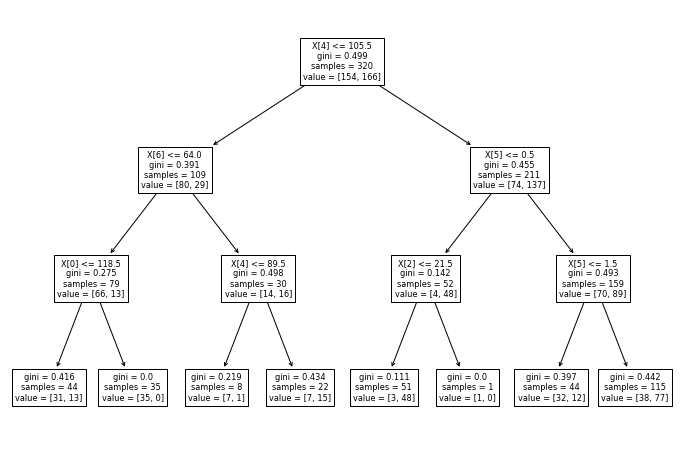

In [54]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(Clf_gini.fit(X_train,y_train))

# visualizing the DT with Graphiz 

In [55]:
conda install python-graphviz


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https//repo.anaconda.com/pkgs/main/win-64'




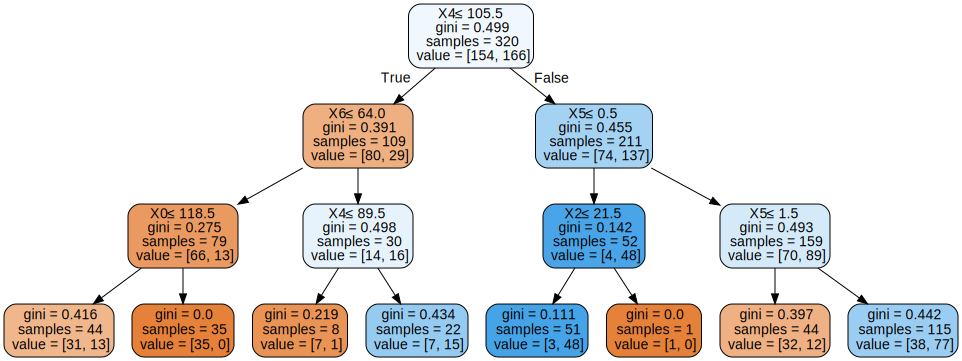

In [56]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
dot_data=tree.export_graphviz(Clf_gini,out_file=None,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

# Decision Tree classifier with criterian entropy 

In [57]:
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## Predict the Test results with criterion entropy 

In [58]:
y_predict_en=clf_en.predict(X_test)

## Checking accuracy score with criterion entropy 

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_en)

0.7375

## Comparing the Train set & Test set accuracy 

### Now,i'll compare the train set & Test set accuracy score to check for overfitting

In [60]:
y_predict_Train_en=clf_en.predict(X_train)
y_predict_Train_en

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [61]:
accuracy_score(y_train,y_predict_Train_en)

0.740625

In [62]:
clf_en.score(X_train,y_train),clf_en.score(X_test,y_test)

(0.740625, 0.7375)

### We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7406 while the test-set accuracy to be 0.7375. These two values are quite comparable. So, there is no sign of overfitting. 

# Visualizing Decesion Tree 

[Text(0.4583333333333333, 0.875, 'X[4] <= 105.5\nentropy = 0.999\nsamples = 320\nvalue = [154, 166]'),
 Text(0.25, 0.625, 'X[0] <= 124.5\nentropy = 0.836\nsamples = 109\nvalue = [80, 29]'),
 Text(0.16666666666666666, 0.375, 'X[6] <= 37.5\nentropy = 0.937\nsamples = 82\nvalue = [53, 29]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.25, 0.125, 'entropy = 0.984\nsamples = 68\nvalue = [39, 29]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.6666666666666666, 0.625, 'X[5] <= 0.5\nentropy = 0.935\nsamples = 211\nvalue = [74, 137]'),
 Text(0.5, 0.375, 'X[3] <= 253.0\nentropy = 0.391\nsamples = 52\nvalue = [4, 48]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.605\nsamples = 27\nvalue = [4, 23]'),
 Text(0.8333333333333334, 0.375, 'X[5] <= 1.5\nentropy = 0.99\nsamples = 159\nvalue = [70, 89]'),
 Text(0.75, 0.125, 'entrop

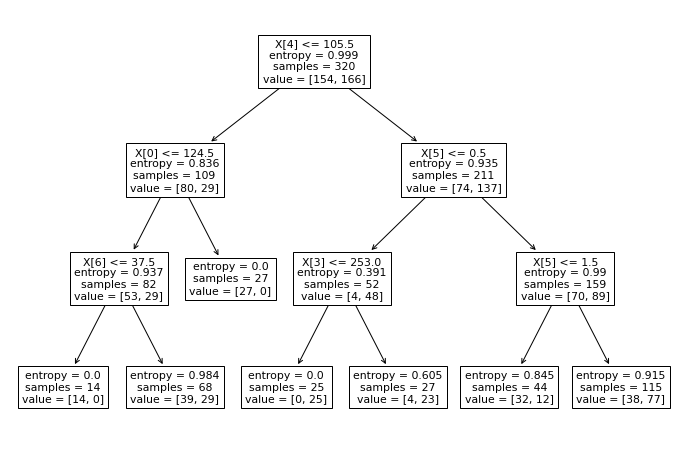

In [63]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train,y_train))

## Visualizing Decision Tree

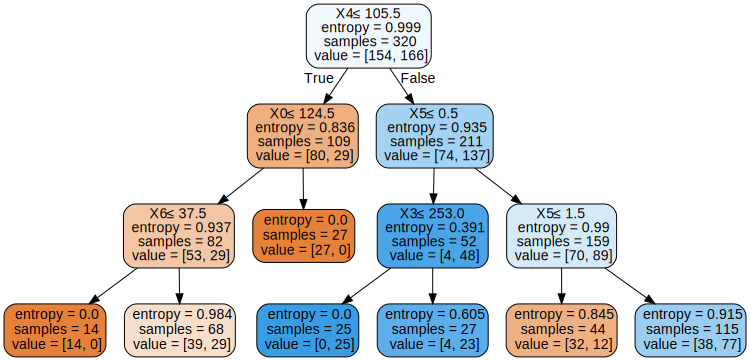

In [64]:
dot_data=tree.export_graphviz(clf_en,out_file=None,filled=True,
                              rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

# Conclusion 

In [65]:
#From the above we can concluded that our classification model accuracy is very good.
#our model is doing a very good job in terms of predicting the class labels.

### But,it doesn't give the underlying distribution of values.Also,it doesn't tell anything about the type of errors our classifier is making hence for that purpose i'm using Confusion Matrix.

# Confusion Matrix

### A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category.

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict_en)
cm

array([[32, 13],
       [ 8, 27]], dtype=int64)

# Classification Report

### Classification report is another way to evaluate the classification model performance. 

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_en))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        45
           1       0.68      0.77      0.72        35

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.75      0.74      0.74        80



# Results & My Conclusion Report 

### 
1.In This assignment i build two models one with criterion gini index and another one with criterion entropy.

2.In the model with criterion gini index,the training-set accuracy score is 0.7406 while the test-set accuracy to be 0.7306.These two values are quite comparable. So, there is no sign of overfitting.

3.Similarly,in the model with criterion entropy, the training-set accuracy score is 0.7406 while the test-set accuracy to be 0.7306.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.

4.The confusion matrix and classification report yields very good model performance.
